In [297]:
## import initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
pd.set_option('display.max_columns', None)

In [299]:
df = pd.read_csv('./FoodieBay.csv')
df.shape

(40130, 17)

In [300]:
df.head(2)

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.50,3.8


In [301]:
df_meta = pd.read_csv('./FoodieBay_metadata.csv')
df_meta

,column name,column description
0,url,url of the restaurant
1,address,address of the restaurant
2,name,name of the restaurant
3,phone,phone number of the restaurant
4,location,"location of the restaurant, i.e., where it is ..."
5,rest_type,"restaurant type, Quick Bites, Casual Dining, C..."
6,cuisines,"list of food styles, such as South Indian, Nor..."
7,menu_item,menus available in the restaurant
8,listed_in_type,type of services where the restaurant is liste...
9,listed_in_city,locations where the restaurant is listed in


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [303]:
## Seems like all non-numeric columns are in 'object' data type.
## Let't convert them to 'category' type.
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x:x.astype('category'))

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   url                 40130 non-null  category
 1   address             40130 non-null  category
 2   name                40130 non-null  category
 3   phone               39246 non-null  category
 4   location            40130 non-null  category
 5   rest_type           40130 non-null  category
 6   cuisines            40112 non-null  category
 7   menu_item           40130 non-null  category
 8   listed_in_type      40130 non-null  category
 9   listed_in_city      40130 non-null  category
 10  online_order        40130 non-null  category
 11  book_table          40130 non-null  category
 12  ave_cost_for_two    39890 non-null  float64 
 13  dish_liked          17351 non-null  category
 14  votes               40130 non-null  int64   
 15  ave_review_ranking  33751 non-null  

## 1. Data Cleaning, initial EDA and outlire handling

In [305]:
## url, address, name, phone not that much important for our analysis.
df.drop(columns=['url','address','phone','name'], inplace=True)

In [306]:
## check missing values
df.isnull().sum()

location                  0
rest_type                 0
cuisines                 18
menu_item                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two        240
dish_liked            22779
votes                     0
ave_review_ranking     6379
rate                   8336
dtype: int64

In [307]:
# get % of missing
df.isnull().sum().apply(lambda x: (x/40129)*100)

location               0.000000
rest_type              0.000000
cuisines               0.044855
menu_item              0.000000
listed_in_type         0.000000
listed_in_city         0.000000
online_order           0.000000
book_table             0.000000
ave_cost_for_two       0.598071
dish_liked            56.764435
votes                  0.000000
ave_review_ranking    15.896235
rate                  20.773007
dtype: float64

In [308]:
## dish_liked has more than half of missing values.
## imputing might give wrong direction to our final model performances.
df.drop(columns=['dish_liked'], inplace=True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            40130 non-null  category
 1   rest_type           40130 non-null  category
 2   cuisines            40112 non-null  category
 3   menu_item           40130 non-null  category
 4   listed_in_type      40130 non-null  category
 5   listed_in_city      40130 non-null  category
 6   online_order        40130 non-null  category
 7   book_table          40130 non-null  category
 8   ave_cost_for_two    39890 non-null  float64 
 9   votes               40130 non-null  int64   
 10  ave_review_ranking  33751 non-null  float64 
 11  rate                31794 non-null  float64 
dtypes: category(8), float64(3), int64(1)
memory usage: 2.0 MB


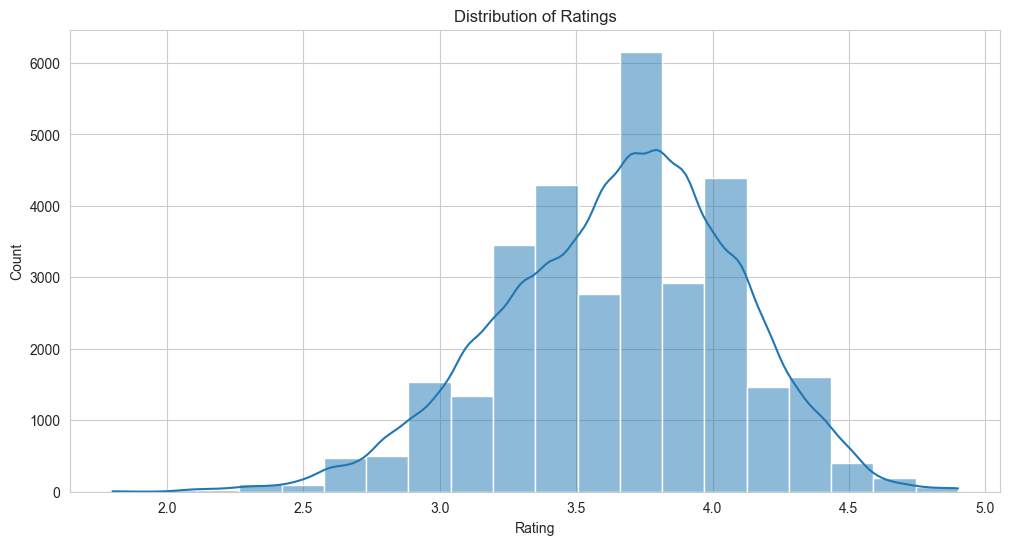

In [310]:

# Setting the style for plots
sns.set_style("whitegrid")

# Plotting the distribution of ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Observations - `rating`
- The distribution of ratings shows a roughly normal distribution with a slight left-skew.
-  The majority of the ratings seem to be concentrated around the 3.5 to 4.0 range.

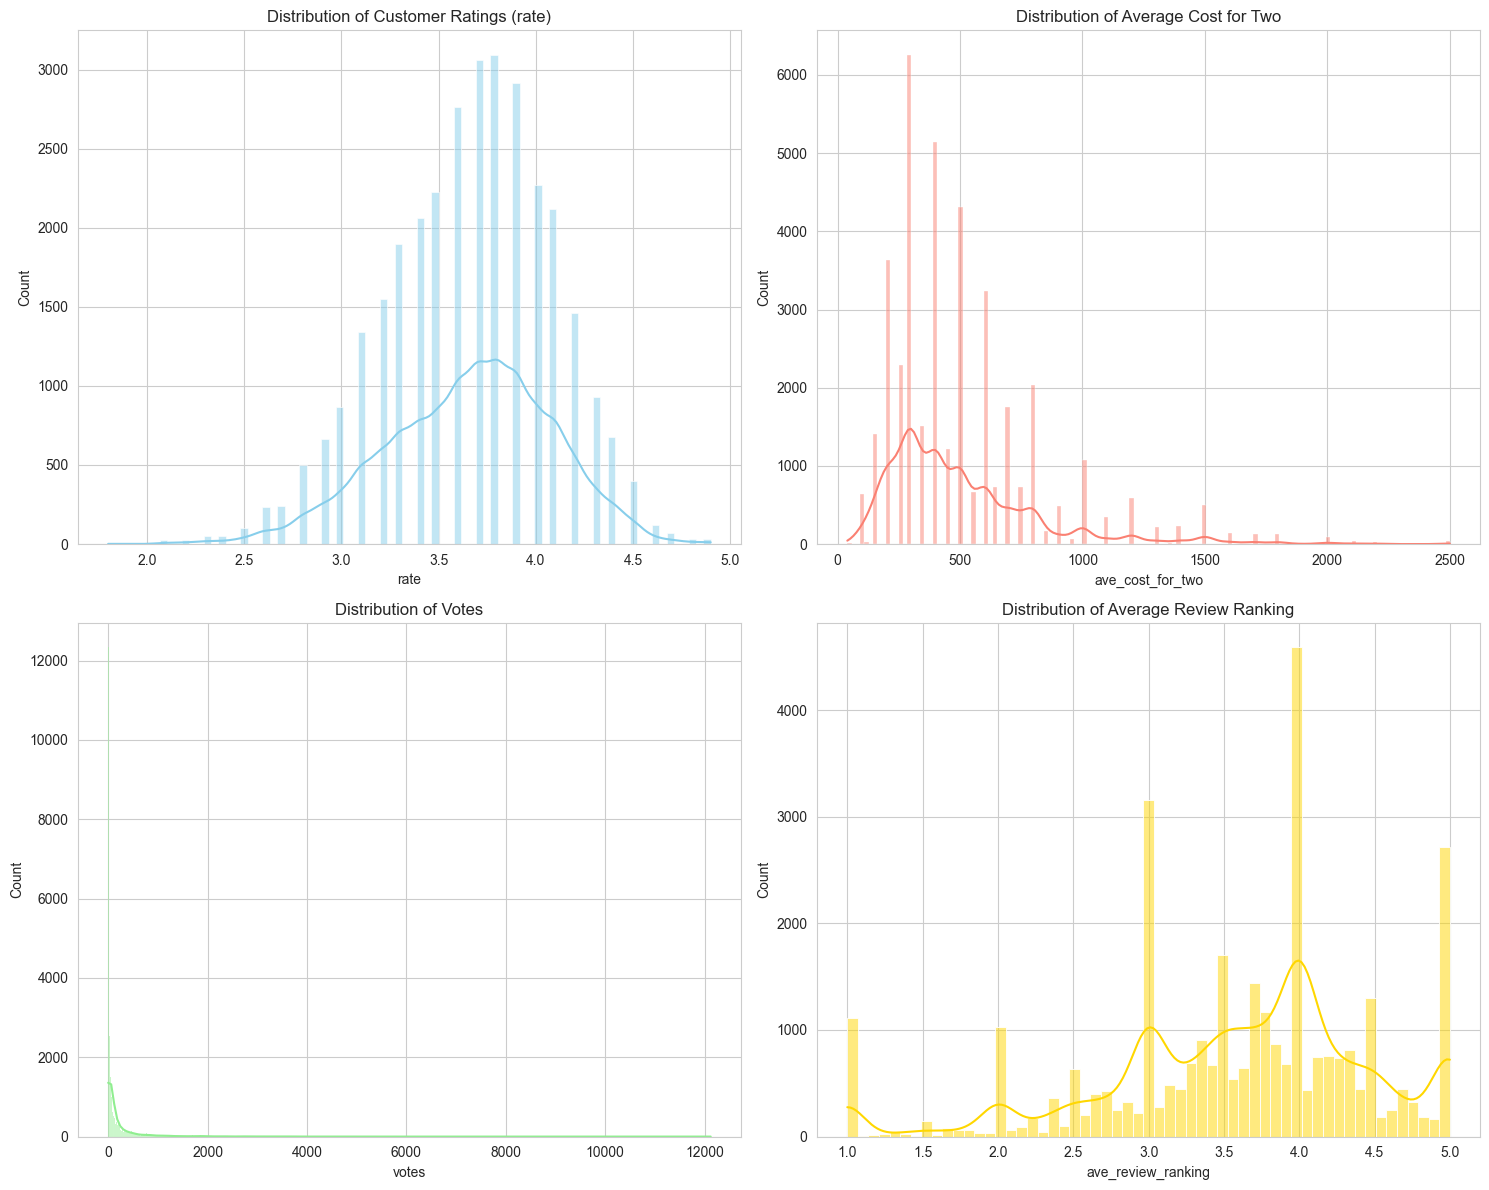

In [311]:
# Visualization of distribution of target variable 'rate' and other significant features

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Distribution of customer ratings
sns.histplot(df['rate'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Customer Ratings (rate)')

# Distribution of average cost for two
sns.histplot(df['ave_cost_for_two'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Average Cost for Two')

# Distribution of votes
sns.histplot(df['votes'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Votes')

# Distribution of average review ranking
sns.histplot(df['ave_review_ranking'].dropna(), kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Average Review Ranking')

plt.tight_layout()
plt.show()


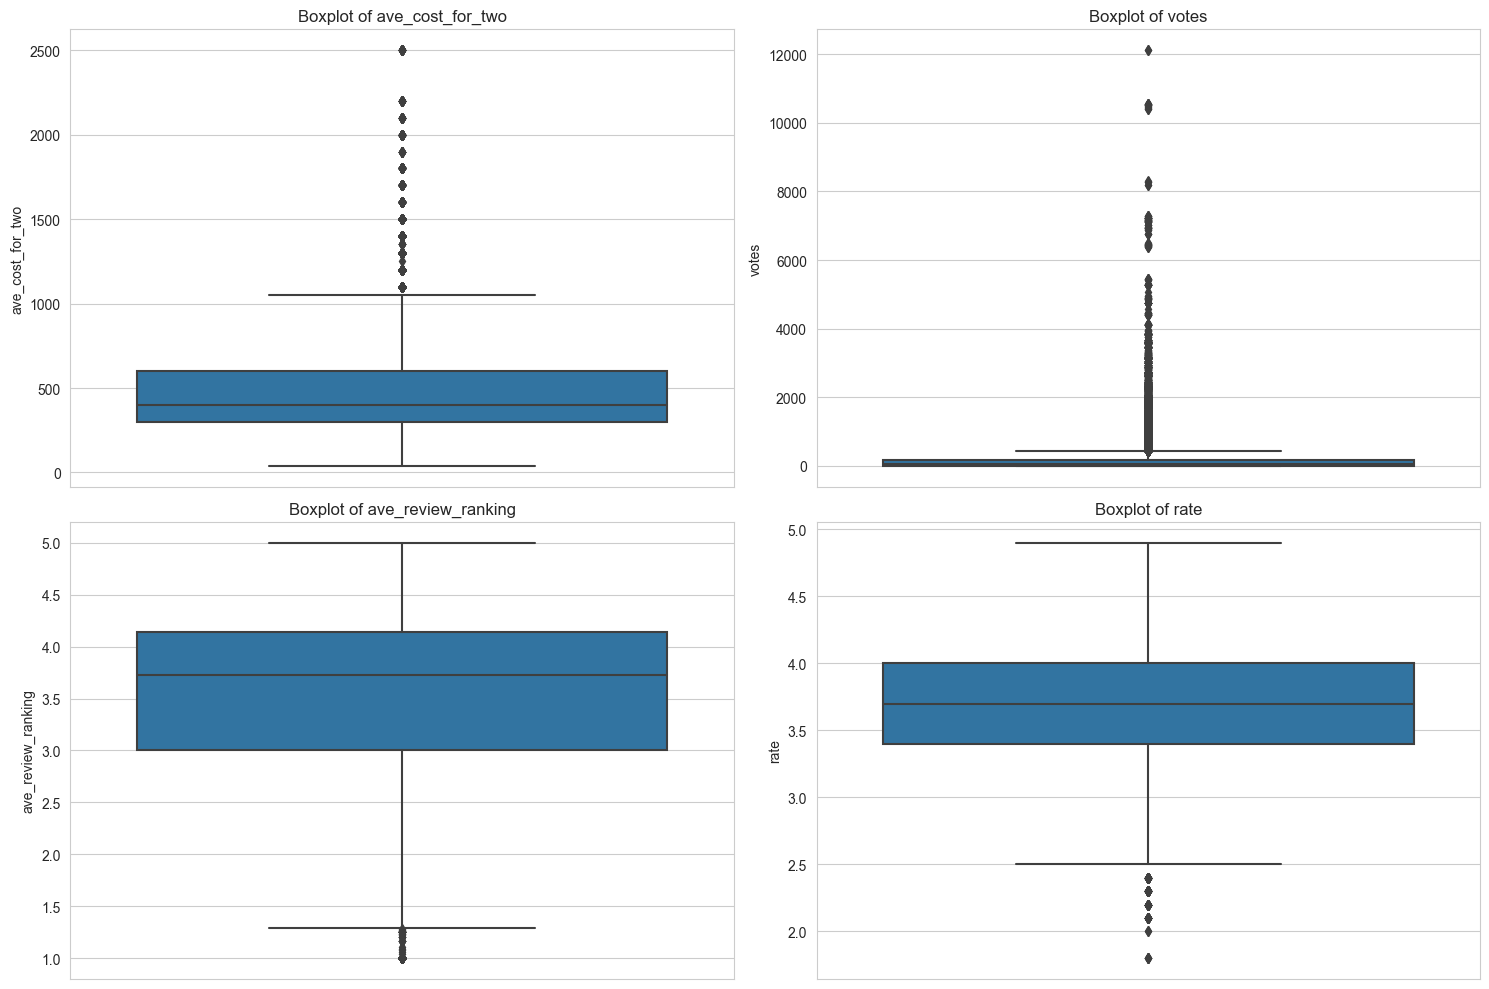

In [312]:
# Numeric columns for outlier detection
numeric_cols = ['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Plot boxplots for numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()


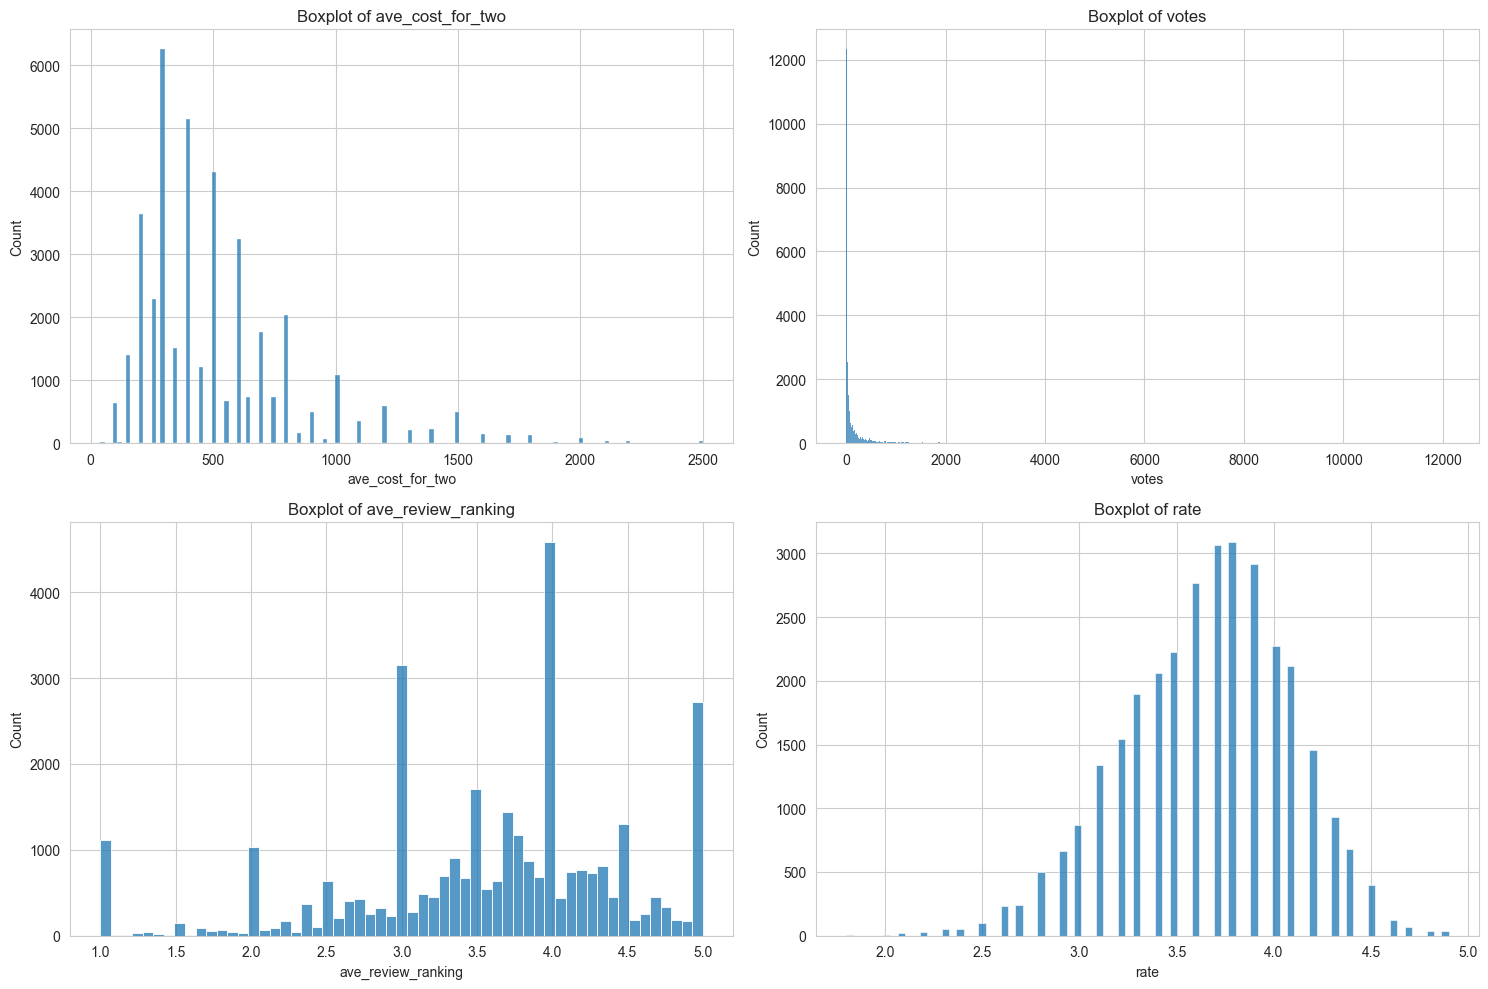

In [313]:
numeric_cols = ['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Plot boxplots for numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

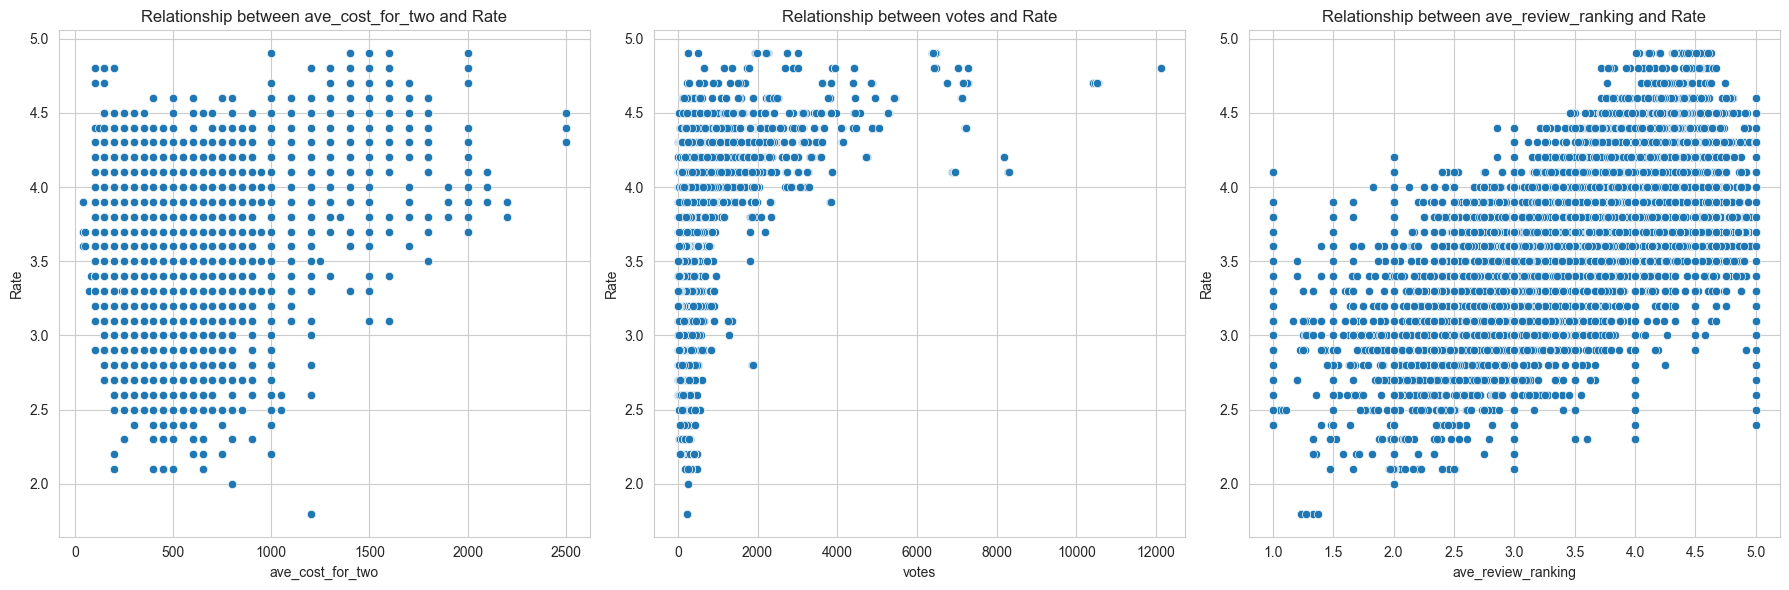

In [362]:
# Visualize the relationship between numerical features and the target variable 'rate'
numerical_features = ['ave_cost_for_two', 'votes', 'ave_review_ranking']

# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='rate', ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Rate')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Rate')

plt.tight_layout()
plt.show()


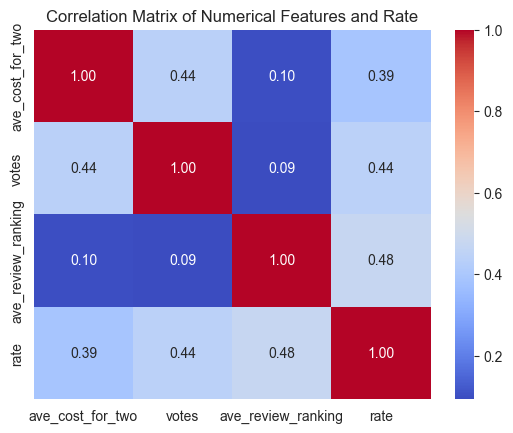

ave_cost_for_two      0.388771
votes                 0.441799
ave_review_ranking    0.475627
rate                  1.000000
Name: rate, dtype: float64

In [363]:
# Calculate the correlation matrix for numerical features and the target variable 'rate'
correlation_matrix = df[numerical_features + ['rate']].corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Rate')
plt.show()

correlation_matrix['rate']


## Observation

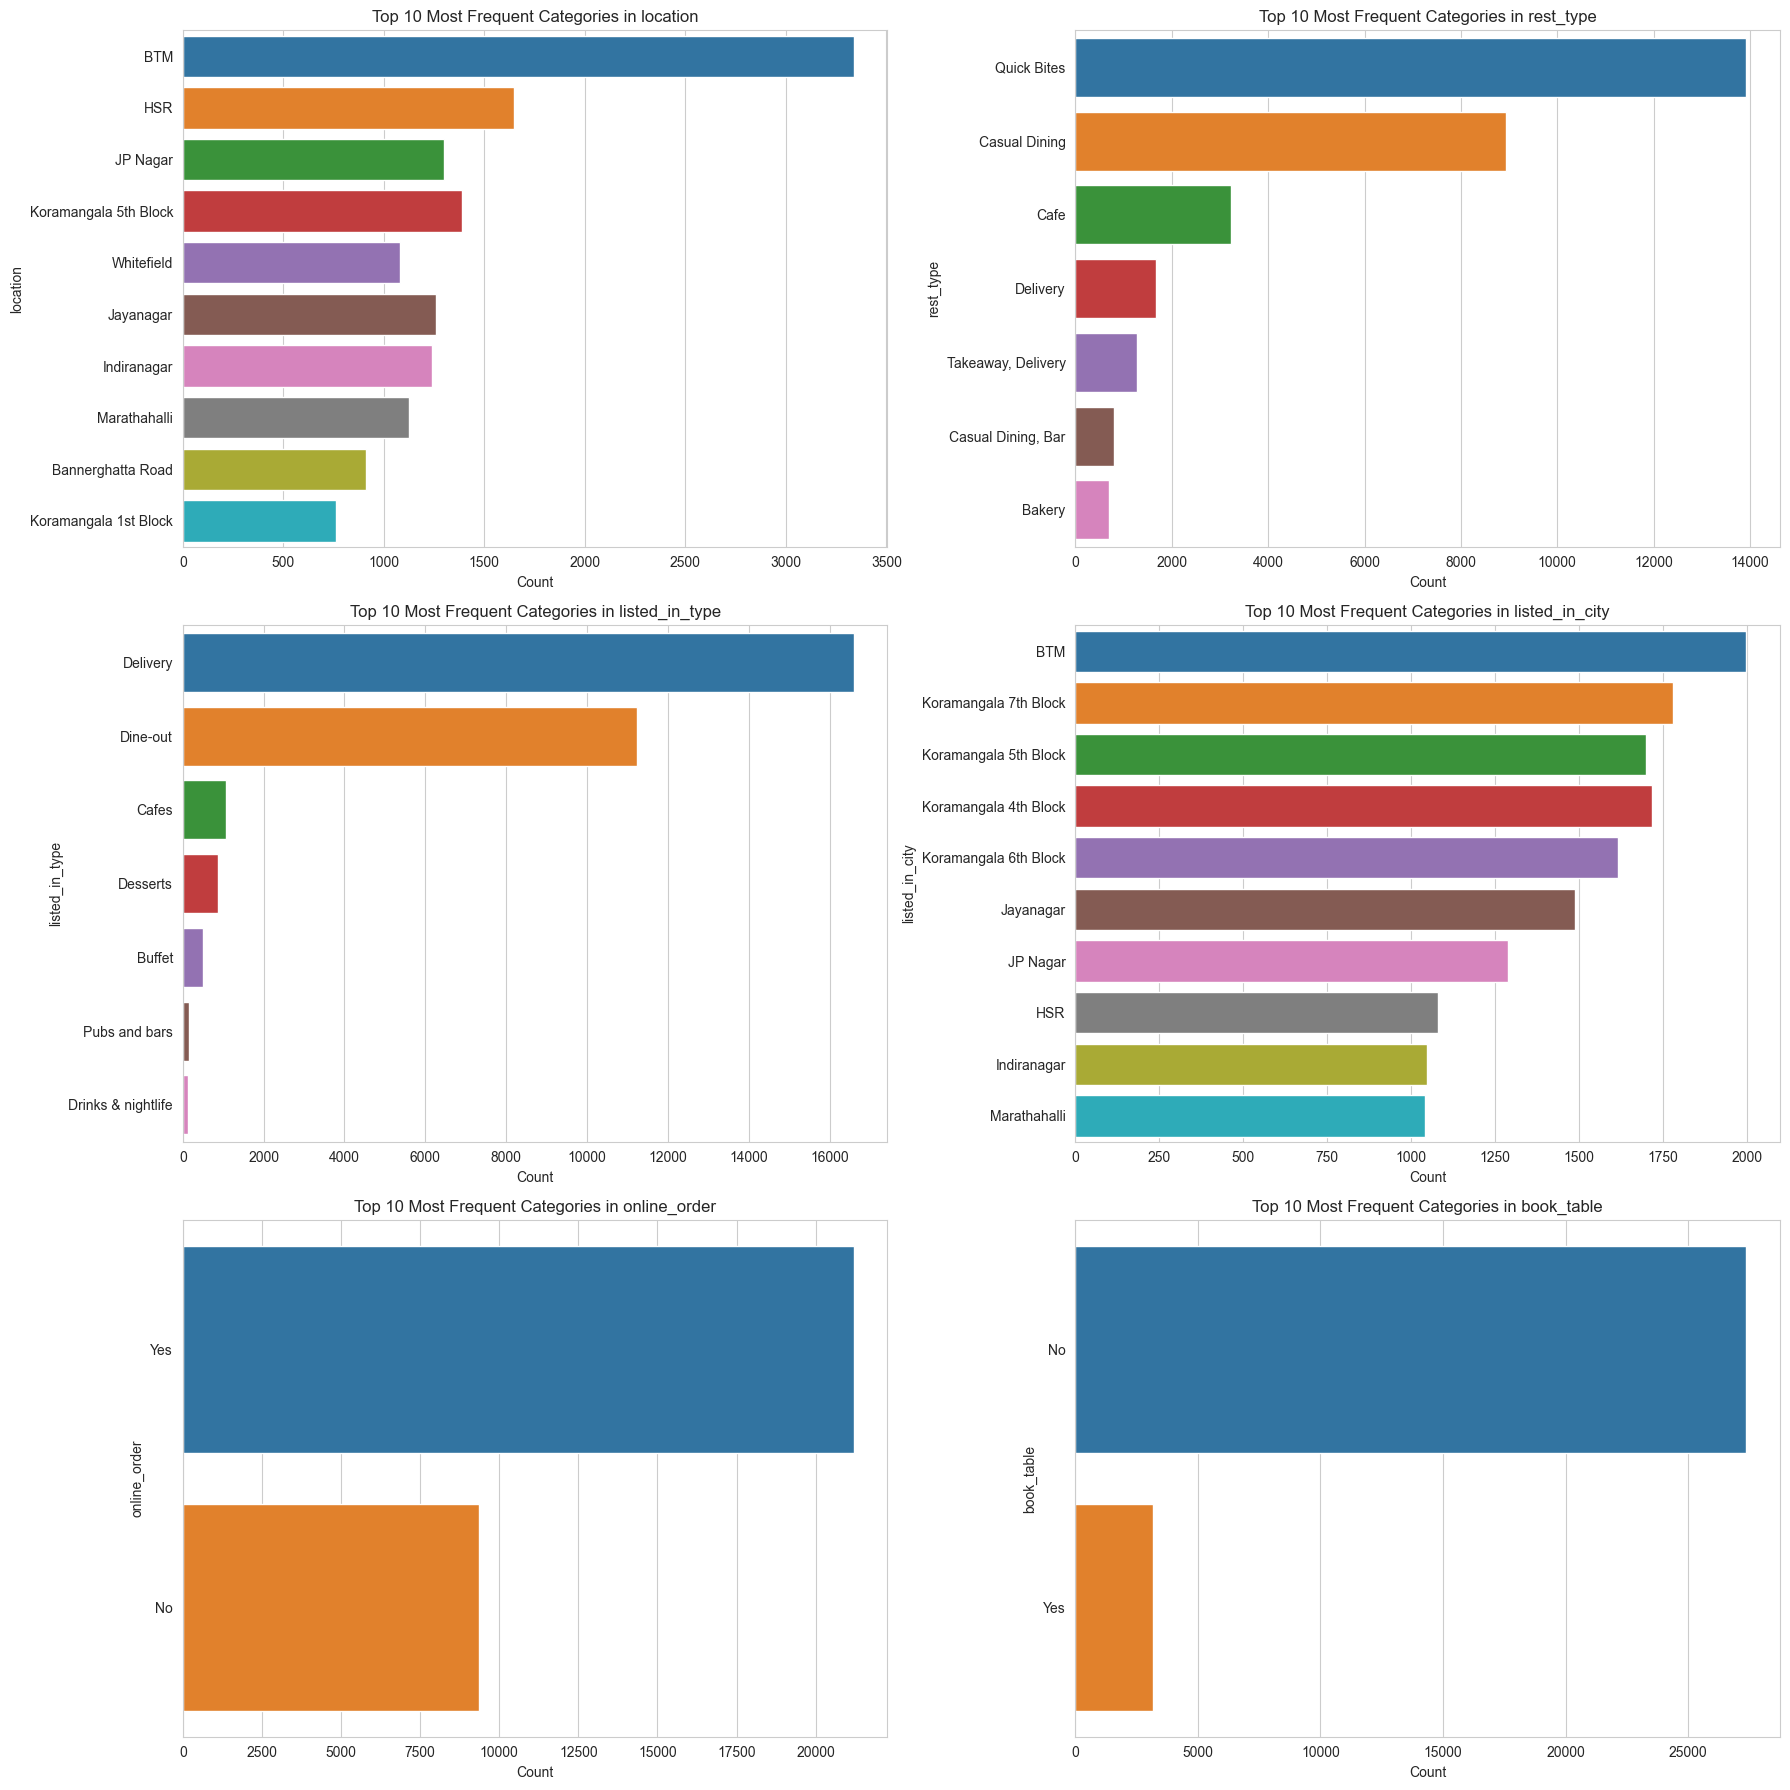

In [364]:
# Visualize the distribution of some key categorical features
categorical_features = ['location', 'rest_type', 'listed_in_type', 'listed_in_city', 'online_order', 'book_table']

# Bar plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(data=df_cleaned, y=feature, order=df[feature].value_counts().index[:10], ax=axes[row, col])
    axes[row, col].set_title(f'Top 10 Most Frequent Categories in {feature}')
    axes[row, col].set_xlabel('Count')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [314]:
from scipy.stats import zscore

# Columns to check for outliers
cols_to_check = ['votes', 'ave_cost_for_two', 'ave_review_ranking']

# Calculate z-scores
z_scores = zscore(df[cols_to_check].dropna())

# Get boolean array indicating the presence of outliers
# Using a threshold of 3 for z-scores
outliers = (abs(z_scores) > 3)

# Display the number of outliers detected for each column
num_outliers = outliers.sum(axis=0)
outliers_dict = dict(zip(cols_to_check, num_outliers))
outliers_dict


{'votes': 706, 'ave_cost_for_two': 607, 'ave_review_ranking': 0}

### Outliers
- votes : 706
- ave_cost_for_two : 607
- ave_review_ranking : 0

In [315]:
## Since we have some large # of examples, we can remove these outliers without much impact.
# Mark rows with outliers in the original dataframe
outlier_indices = df[cols_to_check].dropna().index[outliers.any(axis=1)]

# Drop rows with outliers from the original dataframe
df_cleaned = df.drop(outlier_indices)

# Shape of the dataframe after removing outliers
df_cleaned_shape = df_cleaned.shape
df_cleaned_shape

(38888, 12)

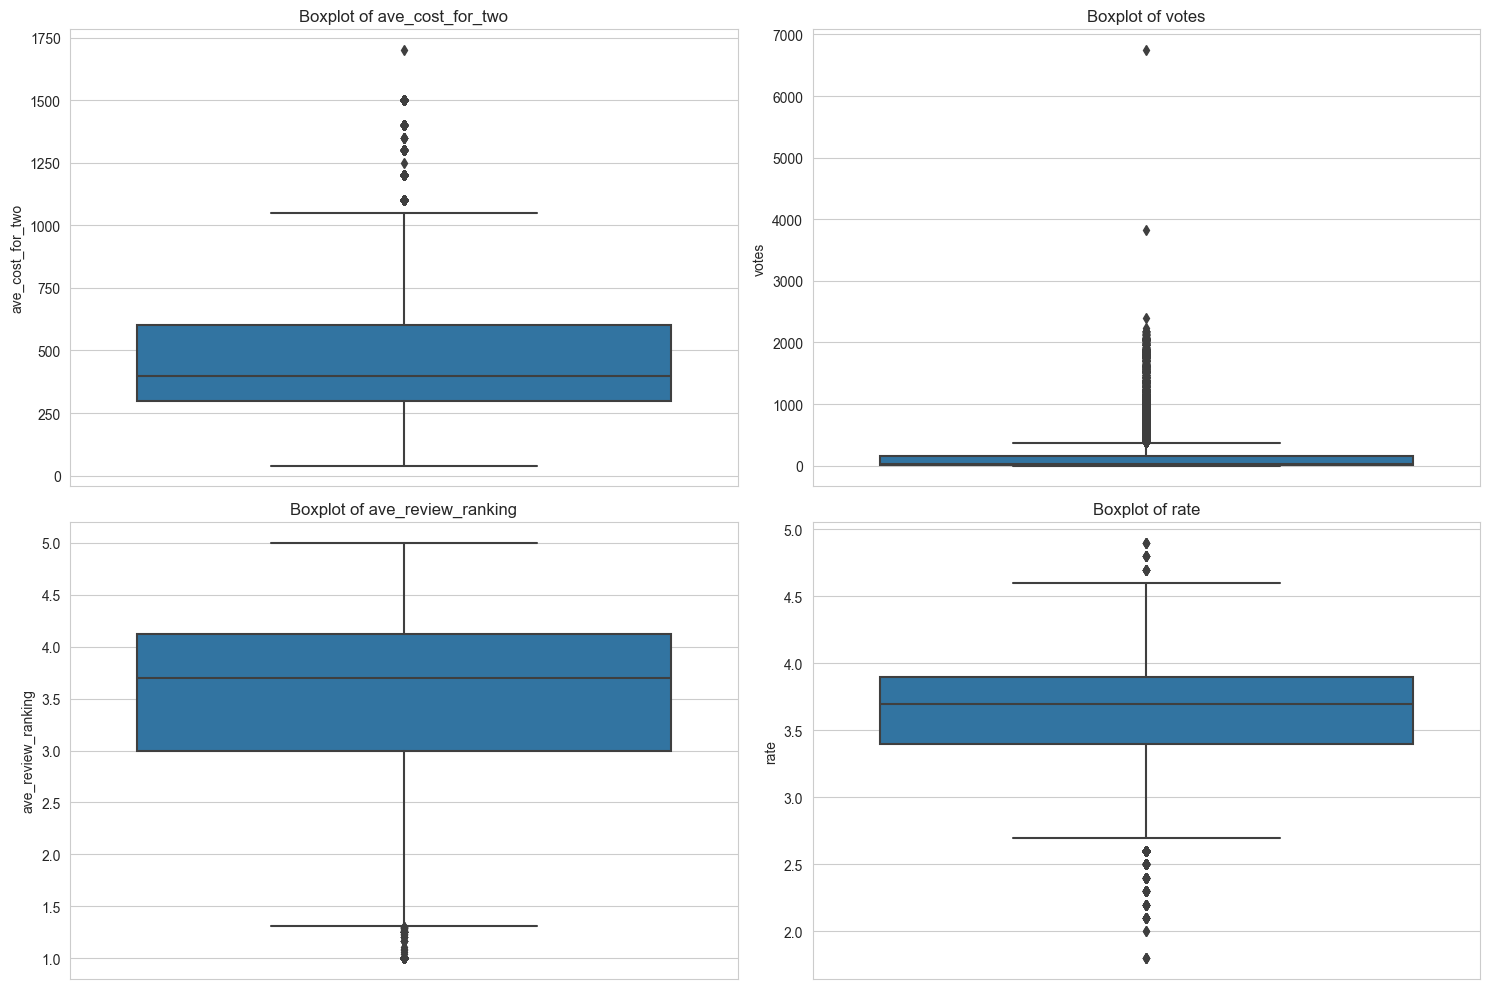

In [316]:
numeric_cols = ['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Plot boxplots for numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

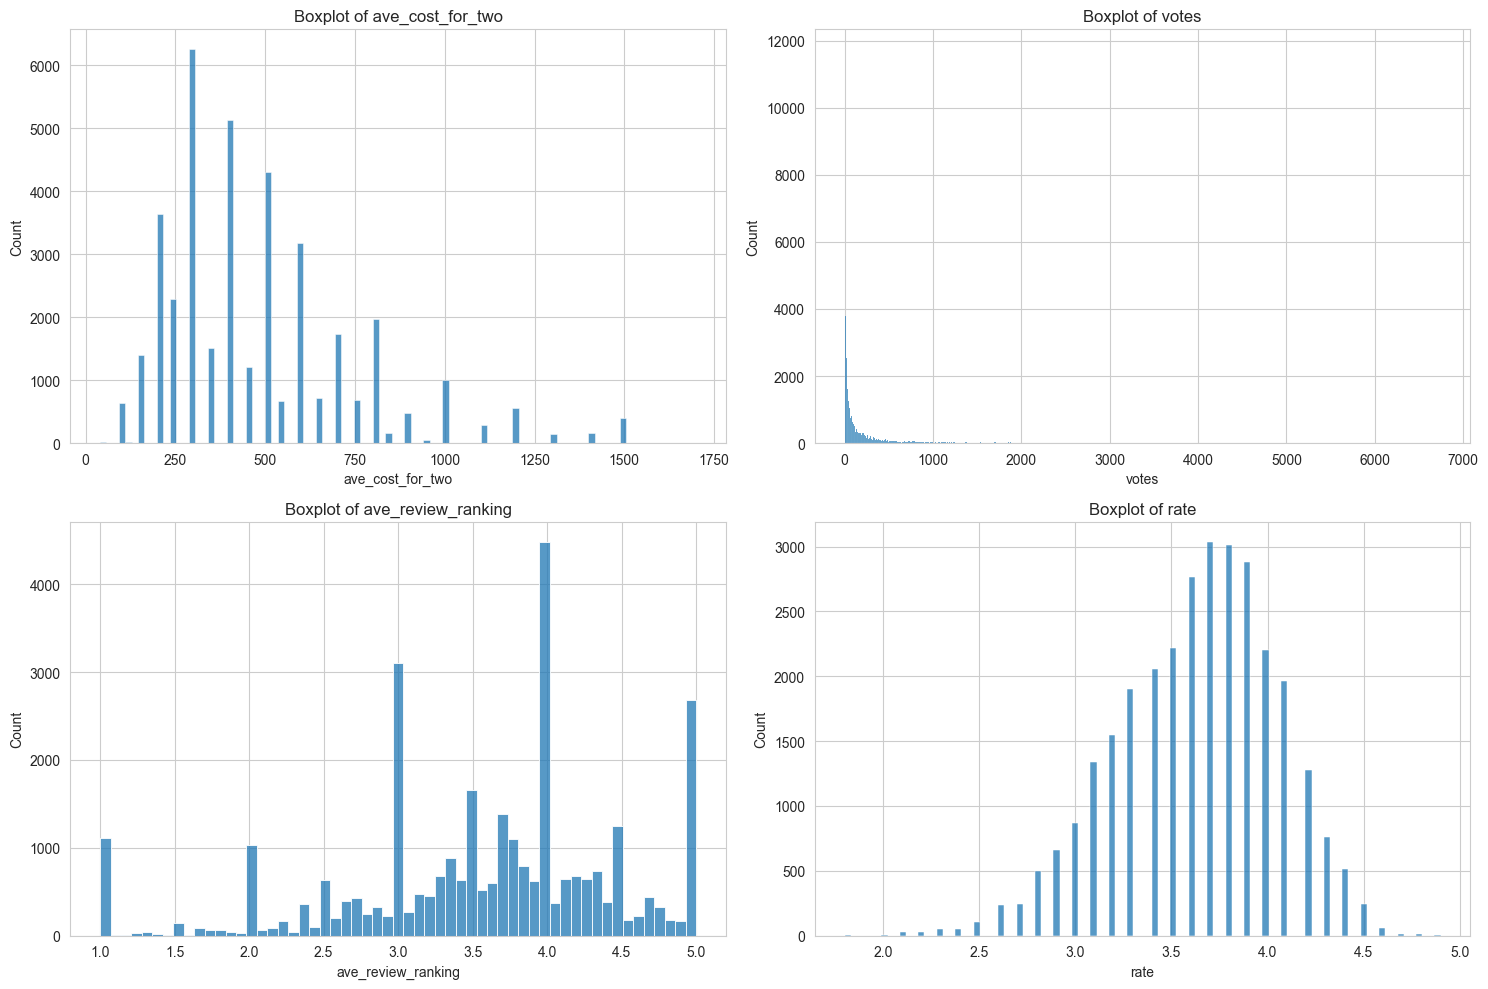

In [317]:
numeric_cols = ['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Plot boxplots for numeric columns to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

## 2. Spliting data

In [318]:
df_cleaned.shape

(38888, 12)

In [319]:
df_cleaned.isnull().sum()

location                 0
rest_type                0
cuisines                18
menu_item                0
listed_in_type           0
listed_in_city           0
online_order             0
book_table               0
ave_cost_for_two       240
votes                    0
ave_review_ranking    6379
rate                  8326
dtype: int64

In [320]:
## we have to delete missing records in the "rate". since it's our target variable.
df_cleaned.dropna(subset=['rate'], inplace=True)
df_cleaned.shape

(30562, 12)

In [321]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df_cleaned, test_size=0.20, random_state=42)

# Shape of training and test sets
train_shape, test_shape = train_df.shape, test_df.shape
train_shape, test_shape

((24449, 12), (6113, 12))

In [322]:
train_df.head()

,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate
18611,Kammanahalli,Quick Bites,"Mithai, Street Food","['Badam Halwa', 'Badam Sticks', 'Ghee and Khov...",Delivery,Kammanahalli,Yes,No,400.0,154,3.000000,4.0
24443,MG Road,Casual Dining,"BBQ, Biryani, Continental",[],Dine-out,Lavelle Road,No,Yes,1500.0,51,4.000000,3.8
29961,Koramangala,Delivery,Beverages,['Goodness Yogurt Ginger Mint Smoothie [190 ml...,Delivery,BTM,Yes,No,250.0,4,5.000000,3.4
30391,BTM,Quick Bites,"South Indian, Seafood, Biryani","['Plain Rice', 'Biryani Rice', 'Chicken Curry ...",Delivery,Koramangala 6th Block,Yes,No,300.0,172,3.650602,3.9
7317,Kalyan Nagar,Cafe,"Cafe, Continental, American, Italian",[],Dine-out,Kalyan Nagar,No,No,600.0,241,3.692308,4.0


## 3. missing value handling

In [323]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24449 entries, 18611 to 31093
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            24449 non-null  category
 1   rest_type           24449 non-null  category
 2   cuisines            24441 non-null  category
 3   menu_item           24449 non-null  category
 4   listed_in_type      24449 non-null  category
 5   listed_in_city      24449 non-null  category
 6   online_order        24449 non-null  category
 7   book_table          24449 non-null  category
 8   ave_cost_for_two    24307 non-null  float64 
 9   votes               24449 non-null  int64   
 10  ave_review_ranking  23724 non-null  float64 
 11  rate                24449 non-null  float64 
dtypes: category(8), float64(3), int64(1)
memory usage: 1.6 MB


In [324]:
train_df.isnull().sum()

location                0
rest_type               0
cuisines                8
menu_item               0
listed_in_type          0
listed_in_city          0
online_order            0
book_table              0
ave_cost_for_two      142
votes                   0
ave_review_ranking    725
rate                    0
dtype: int64

In [325]:
m = train_df.ave_cost_for_two.median()
train_df.ave_cost_for_two.fillna(m,inplace=True)
test_df.ave_cost_for_two.fillna(m, inplace=True)

In [326]:
train_df.isnull().sum()

location                0
rest_type               0
cuisines                8
menu_item               0
listed_in_type          0
listed_in_city          0
online_order            0
book_table              0
ave_cost_for_two        0
votes                   0
ave_review_ranking    725
rate                    0
dtype: int64

In [327]:
m = train_df.ave_review_ranking.median()
train_df.ave_review_ranking.fillna(m,inplace=True)
test_df.ave_review_ranking.fillna(m, inplace=True)

In [328]:
train_df.isnull().sum()

location              0
rest_type             0
cuisines              8
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two      0
votes                 0
ave_review_ranking    0
rate                  0
dtype: int64

In [329]:
test_df.isnull().sum()

location              0
rest_type             0
cuisines              0
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two      0
votes                 0
ave_review_ranking    0
rate                  0
dtype: int64

In [330]:
# Calculate the mode of the 'cuisines' column from the training set
cuisines_mode = train_df['cuisines'].mode()[0]

# Fill missing values in 'cuisines' column in both training and testing sets using the mode
train_df['cuisines'].fillna(cuisines_mode, inplace=True)
test_df['cuisines'].fillna(cuisines_mode, inplace=True)

# Verify if the missing values in 'cuisines' column have been addressed
missing_cuisines_train = train_df['cuisines'].isnull().sum()
missing_cuisines_test = test_df['cuisines'].isnull().sum()

missing_cuisines_train, missing_cuisines_test

(0, 0)

In [331]:
test_df.isnull().sum()

location              0
rest_type             0
cuisines              0
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two      0
votes                 0
ave_review_ranking    0
rate                  0
dtype: int64

In [332]:
train_df.isnull().sum()

location              0
rest_type             0
cuisines              0
menu_item             0
listed_in_type        0
listed_in_city        0
online_order          0
book_table            0
ave_cost_for_two      0
votes                 0
ave_review_ranking    0
rate                  0
dtype: int64

## 4. Encoding

In [333]:
# Binary encode the 'online_order' and 'book_table' columns

# For the training set
train_df['online_order'] = train_df['online_order'].map({'Yes': 1, 'No': 0})
train_df['book_table'] = train_df['book_table'].map({'Yes': 1, 'No': 0})

# For the testing set
test_df['online_order'] = test_df['online_order'].map({'Yes': 1, 'No': 0})
test_df['book_table'] = test_df['book_table'].map({'Yes': 1, 'No': 0})

# Verify the changes
train_df[['online_order', 'book_table']].head(), test_df[['online_order', 'book_table']].head()


(      online_order book_table
 18611            1          0
 24443            0          1
 29961            1          0
 30391            1          0
 7317             0          0,
       online_order book_table
 28691            1          0
 35310            0          0
 6367             1          0
 24011            1          0
 30691            0          0)

In [334]:
# Check the number of unique values in each categorical column
unique_values = {
    'location': train_df['location'].nunique(),
    'rest_type': train_df['rest_type'].nunique(),
    'cuisines': train_df['cuisines'].nunique(),
    'listed_in_type': train_df['listed_in_type'].nunique(),
    'listed_in_city': train_df['listed_in_city'].nunique()
}

unique_values

{'location': 92,
 'rest_type': 7,
 'cuisines': 1791,
 'listed_in_type': 7,
 'listed_in_city': 30}

**Suitable for One-Hot Encoding**

-  rest_type: With only 7 unique values, one-hot encoding this column will add 7 new columns.-  
listed_in_type: Similarly, this column will add only 7 new columns
-  
listed_in_city: This will add 30 new columns, which might still be reasonab.

**Potential Issues:**

-  location: One-hot encoding this will add 90 new columns, which could be okay depending on the total number of features and the type of model you're planning to use.
-  cuisines: With 1,867 unique values, one-hot encoding will add a significant number of columns, which could lead to the curse of dimensionality. It might be better to consider alternative encoding or feature engineering methods for this column.lelumn.


In [335]:
# One-hot encode the suitable columns in the training set
train_encoded = pd.get_dummies(train_df, columns=['rest_type', 'listed_in_type', 'listed_in_city'], drop_first=True)

# One-hot encode the suitable columns in the testing set
test_encoded = pd.get_dummies(test_df, columns=['rest_type', 'listed_in_type', 'listed_in_city'], drop_first=True)

# Verify the changes by checking the shape of the datasets
train_encoded.shape, test_encoded.shape


((24449, 50), (6113, 50))

## Handling `location` column
- 90 different values add addtional 90 columns to the dataset.
- so I decide to combine rare locations together.

In [336]:
# Get the frequency distribution of the 'location' column in the training set
location_counts = train_df['location'].value_counts()

location_counts


location
BTM                      2662
HSR                      1320
Koramangala 5th Block    1083
JP Nagar                 1038
Jayanagar                 998
                         ... 
North Bangalore             2
Central Bangalore           2
Peenya                      1
Nagarbhavi                  1
Jakkur                      0
Name: count, Length: 93, dtype: int64

In [337]:
# Frequency encoding for the 'location' column in the training set
location_freq_map = train_encoded['location'].value_counts().to_dict()
train_encoded['location_freq_encoded'] = train_encoded['location'].map(location_freq_map)

# Apply the same frequency encoding to the test set using the frequency map from the training set
test_encoded['location_freq_encoded'] = test_encoded['location'].map(location_freq_map).fillna(0)  # Fill any unknown locations with 0

# Verify the changes
train_encoded[['location', 'location_freq_encoded']].head(), test_encoded[['location', 'location_freq_encoded']].head()


(           location  location_freq_encoded
 18611  Kammanahalli                    325
 24443       MG Road                    262
 29961   Koramangala                     26
 30391           BTM                   2662
 7317   Kalyan Nagar                    414,
                     location  location_freq_encoded
 28691  Koramangala 7th Block                    610
 35310           Sanjay Nagar                     31
 6367            Kammanahalli                    325
 24011      Bannerghatta Road                    746
 30691                Ejipura                    202)

In [338]:
# Drop the 'location' column from both training and testing datasets
train_encoded = train_encoded.drop(columns=['location'])
test_encoded = test_encoded.drop(columns=['location'])

# Verify the changes by checking the columns of the datasets
train_columns = train_encoded.columns
test_columns = test_encoded.columns

In [339]:
train_columns.size, test_columns.size

(50, 50)

### Handling `Cuisines` column
- I'm going to use following startegy.
- **Count of Cuisines:**
- Create a new feature called num_cuisines that represents the number of cuisines a restaurant offers.

- **Top N Cuisines:**
- Identify the top N (e.g., top 10) most common cuisines from the training set.- 
Create one-hot encoded columns for these top N cuisines.- 
Group the rest of the cuisines under an "Other" category.

In [340]:
# Create a new feature for the count of cuisines in both training and testing sets
train_encoded['num_cuisines'] = train_encoded['cuisines'].str.split(',').str.len()
test_encoded['num_cuisines'] = test_encoded['cuisines'].str.split(',').str.len()

# Verify the changes
train_encoded[['cuisines', 'num_cuisines']].head(), test_encoded[['cuisines', 'num_cuisines']].head()


(                                   cuisines  num_cuisines
 18611                   Mithai, Street Food             2
 24443             BBQ, Biryani, Continental             3
 29961                             Beverages             1
 30391        South Indian, Seafood, Biryani             3
 7317   Cafe, Continental, American, Italian             4,
                                  cuisines  num_cuisines
 28691        Burger, Fast Food, Beverages             3
 35310             North Indian, Fast Food             2
 6367   Fast Food, Burger, Pizza, Sandwich             4
 24011             North Indian, Fast Food             2
 30691                        South Indian             1)

In [341]:
# Get the frequency of each cuisine in the training set
all_cuisines = train_encoded['cuisines'].str.split(',', expand=True).stack().str.strip()
top_10_cuisines = all_cuisines.value_counts().head(10).index.tolist()

top_10_cuisines


['North Indian',
 'Chinese',
 'South Indian',
 'Fast Food',
 'Biryani',
 'Cafe',
 'Continental',
 'Italian',
 'Beverages',
 'Street Food']

In [342]:
train_df = train_encoded.copy()
test_df = test_encoded.copy()

In [343]:
train_df.shape, test_df.shape

((24449, 51), (6113, 51))

In [344]:
train_df.drop(columns=['cuisines'], inplace=True)
test_df.drop(columns=['cuisines'], inplace=True)

### Handling `menu_items`

In [345]:
# Create a new feature for the count of menu items in both training and testing sets
train_df['num_menu_items'] = train_df['menu_item'].str.split(',').str.len()
test_df['num_menu_items'] = test_df['menu_item'].str.split(',').str.len()

# Verify the changes
train_menu_items_sample = train_df[['menu_item', 'num_menu_items']].head()
test_menu_items_sample = test_df[['menu_item', 'num_menu_items']].head()

train_menu_items_sample, test_menu_items_sample


(                                               menu_item  num_menu_items
 18611  ['Badam Halwa', 'Badam Sticks', 'Ghee and Khov...             139
 24443                                                 []               1
 29961  ['Goodness Yogurt Ginger Mint Smoothie [190 ml...              12
 30391  ['Plain Rice', 'Biryani Rice', 'Chicken Curry ...              37
 7317                                                  []               1,
                                                menu_item  num_menu_items
 28691  ['Crispy Veg', 'Crispy Veg Supreme', 'Veg Chil...              43
 35310                                                 []               1
 6367                                                  []               1
 24011                                                 []               1
 30691                                                 []               1)

In [346]:
train_df.drop(columns=['menu_item'], inplace=True)
test_df.drop(columns=['menu_item'], inplace=True)

In [347]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24449 entries, 18611 to 31093
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   online_order                          24449 non-null  category
 1   book_table                            24449 non-null  category
 2   ave_cost_for_two                      24449 non-null  float64 
 3   votes                                 24449 non-null  int64   
 4   ave_review_ranking                    24449 non-null  float64 
 5   rate                                  24449 non-null  float64 
 6   rest_type_Cafe                        24449 non-null  bool    
 7   rest_type_Casual Dining               24449 non-null  bool    
 8   rest_type_Casual Dining, Bar          24449 non-null  bool    
 9   rest_type_Delivery                    24449 non-null  bool    
 10  rest_type_Quick Bites                 24449 non-null  bool    
 11  res

In [348]:
train_df.isnull().sum()

online_order                            0
book_table                              0
ave_cost_for_two                        0
votes                                   0
ave_review_ranking                      0
rate                                    0
rest_type_Cafe                          0
rest_type_Casual Dining                 0
rest_type_Casual Dining, Bar            0
rest_type_Delivery                      0
rest_type_Quick Bites                   0
rest_type_Takeaway, Delivery            0
listed_in_type_Cafes                    0
listed_in_type_Delivery                 0
listed_in_type_Desserts                 0
listed_in_type_Dine-out                 0
listed_in_type_Drinks & nightlife       0
listed_in_type_Pubs and bars            0
listed_in_city_Banashankari             0
listed_in_city_Bannerghatta Road        0
listed_in_city_Basavanagudi             0
listed_in_city_Bellandur                0
listed_in_city_Brigade Road             0
listed_in_city_Brookefield        

In [349]:
train_df[train_df.select_dtypes('bool').columns] = train_df.select_dtypes('bool').apply(lambda x:x.astype('int64'))
test_df[test_df.select_dtypes('bool').columns] = test_df.select_dtypes('bool').apply(lambda x:x.astype('int64'))

In [350]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24449 entries, 18611 to 31093
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   online_order                          24449 non-null  category
 1   book_table                            24449 non-null  category
 2   ave_cost_for_two                      24449 non-null  float64 
 3   votes                                 24449 non-null  int64   
 4   ave_review_ranking                    24449 non-null  float64 
 5   rate                                  24449 non-null  float64 
 6   rest_type_Cafe                        24449 non-null  int64   
 7   rest_type_Casual Dining               24449 non-null  int64   
 8   rest_type_Casual Dining, Bar          24449 non-null  int64   
 9   rest_type_Delivery                    24449 non-null  int64   
 10  rest_type_Quick Bites                 24449 non-null  int64   
 11  res

In [351]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6113 entries, 28691 to 2474
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   online_order                          6113 non-null   category
 1   book_table                            6113 non-null   category
 2   ave_cost_for_two                      6113 non-null   float64 
 3   votes                                 6113 non-null   int64   
 4   ave_review_ranking                    6113 non-null   float64 
 5   rate                                  6113 non-null   float64 
 6   rest_type_Cafe                        6113 non-null   int64   
 7   rest_type_Casual Dining               6113 non-null   int64   
 8   rest_type_Casual Dining, Bar          6113 non-null   int64   
 9   rest_type_Delivery                    6113 non-null   int64   
 10  rest_type_Quick Bites                 6113 non-null   int64   
 11  rest_

In [352]:
train_df[train_df.select_dtypes('category').columns] = train_df.select_dtypes('category').apply(lambda x:x.astype('int64'))
test_df[test_df.select_dtypes('category').columns] = test_df.select_dtypes('category').apply(lambda x:x.astype('int64'))

In [353]:
train_df.shape, test_df.shape

((24449, 50), (6113, 50))

## 5. Standraization

In [354]:
from sklearn.preprocessing import StandardScaler

# Choosing columns to scale
columns_to_standarize = ['ave_cost_for_two', 'ave_review_ranking','votes','location_freq_encoded','num_cuisines','num_menu_items' ]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
train_df[columns_to_standarize] = scaler.fit_transform(train_df[columns_to_standarize])
test_df[columns_to_standarize] = scaler.fit_transform(test_df[columns_to_standarize])

# Display the first few rows after scaling
train_df.head()


,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,rest_type_Cafe,rest_type_Casual Dining,"rest_type_Casual Dining, Bar",rest_type_Delivery,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",listed_in_type_Cafes,listed_in_type_Delivery,listed_in_type_Desserts,listed_in_type_Dine-out,listed_in_type_Drinks & nightlife,listed_in_type_Pubs and bars,listed_in_city_Banashankari,listed_in_city_Bannerghatta Road,listed_in_city_Basavanagudi,listed_in_city_Bellandur,listed_in_city_Brigade Road,listed_in_city_Brookefield,listed_in_city_Church Street,listed_in_city_Electronic City,listed_in_city_Frazer Town,listed_in_city_HSR,listed_in_city_Indiranagar,listed_in_city_JP Nagar,listed_in_city_Jayanagar,listed_in_city_Kalyan Nagar,listed_in_city_Kammanahalli,listed_in_city_Koramangala 4th Block,listed_in_city_Koramangala 5th Block,listed_in_city_Koramangala 6th Block,listed_in_city_Koramangala 7th Block,listed_in_city_Lavelle Road,listed_in_city_MG Road,listed_in_city_Malleshwaram,listed_in_city_Marathahalli,listed_in_city_New BEL Road,listed_in_city_Old Airport Road,listed_in_city_Rajajinagar,listed_in_city_Residency Road,listed_in_city_Sarjapur Road,listed_in_city_Whitefield,location_freq_encoded,num_cuisines,num_menu_items
18611,1,0,-0.398973,-0.135946,-0.670018,4.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.684038,-0.408140,1.527109
24443,0,1,3.579574,-0.437484,0.501297,3.8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.770567,0.368708,-0.459725
29961,1,0,-0.941502,-0.575079,1.672613,3.4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.094707,-1.184988,-0.301355
30391,1,0,-0.760659,-0.083250,0.092042,3.9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.525774,0.368708,0.058579
7317,0,0,0.324399,0.118751,0.140892,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.561799,1.145556,-0.459725


In [355]:
test_df.head()

,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,rest_type_Cafe,rest_type_Casual Dining,"rest_type_Casual Dining, Bar",rest_type_Delivery,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",listed_in_type_Cafes,listed_in_type_Delivery,listed_in_type_Desserts,listed_in_type_Dine-out,listed_in_type_Drinks & nightlife,listed_in_type_Pubs and bars,listed_in_city_Banashankari,listed_in_city_Bannerghatta Road,listed_in_city_Basavanagudi,listed_in_city_Bellandur,listed_in_city_Brigade Road,listed_in_city_Brookefield,listed_in_city_Church Street,listed_in_city_Electronic City,listed_in_city_Frazer Town,listed_in_city_HSR,listed_in_city_Indiranagar,listed_in_city_JP Nagar,listed_in_city_Jayanagar,listed_in_city_Kalyan Nagar,listed_in_city_Kammanahalli,listed_in_city_Koramangala 4th Block,listed_in_city_Koramangala 5th Block,listed_in_city_Koramangala 6th Block,listed_in_city_Koramangala 7th Block,listed_in_city_Lavelle Road,listed_in_city_MG Road,listed_in_city_Malleshwaram,listed_in_city_Marathahalli,listed_in_city_New BEL Road,listed_in_city_Old Airport Road,listed_in_city_Rajajinagar,listed_in_city_Residency Road,listed_in_city_Sarjapur Road,listed_in_city_Whitefield,location_freq_encoded,num_cuisines,num_menu_items
28691,1,0,0.320743,2.461982,0.143648,3.9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.298919,0.364446,0.143234
35310,0,0,-0.403417,-0.562238,-1.622622,3.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.088523,-0.406173,-0.470711
6367,1,0,-0.403417,-0.585727,1.674414,3.3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.687584,1.135066,-0.470711
24011,1,0,-0.041337,-0.356709,-0.139721,3.7,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.113450,-0.406173,-0.470711
30691,0,0,-1.127577,-0.538749,0.128929,3.6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.855324,-1.176793,-0.470711


In [356]:
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

## 6. Model selection and model build

In [357]:
X_train,y_train = train_df.drop(columns=['rate']), train_df['rate']
X_test,y_test = test_df.drop(columns=['rate']), test_df['rate']

In [358]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24449, 49), (24449,), (6113, 49), (6113,))

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
train_df = pd.read_csv('./train_df.csv')
test_df = pd.read_csv('./test_df.csv')

# Split the data into features (X) and target (y)
X_train = train_df.drop('rate', axis=1)
y_train = train_df['rate']
X_test = train_df.drop('rate', axis=1)
y_test = train_df['rate']

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse


0.307557851626738

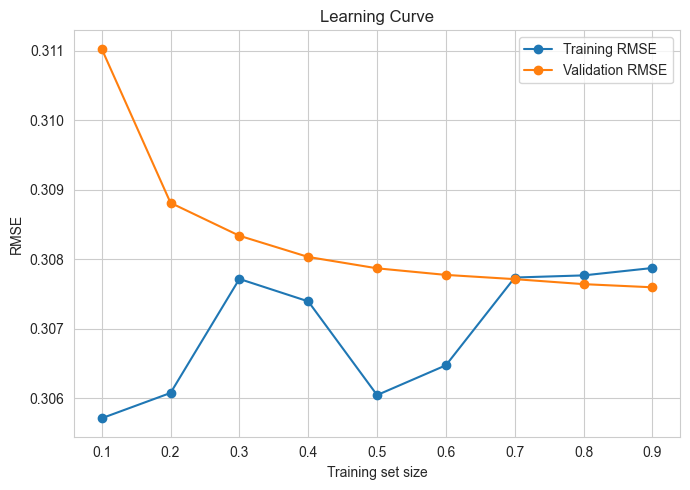

In [360]:
# Adjust train_sizes to exclude 1.0
train_sizes = np.linspace(0.1, 0.9, 9)
train_errors, test_errors = [], []

for train_size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    lr_model_sub = LinearRegression().fit(X_train_sub, y_train_sub)
    train_errors.append(mean_squared_error(y_train_sub, lr_model_sub.predict(X_train_sub)))
    test_errors.append(mean_squared_error(y_test, lr_model_sub.predict(X_test)))

# Re-plot the learning curve
plt.figure(figsize=(7, 5))
plt.plot(train_sizes, np.sqrt(train_errors), 'o-', label='Training RMSE')
plt.plot(train_sizes, np.sqrt(test_errors), 'o-', label='Validation RMSE')
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()


## Decision tree approach

In [361]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize a Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

best_params, best_rmse


({'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5},
 0.20496491912085885)

In [231]:
# Train the Decision Tree model using the best hyperparameters
final_dt_model = DecisionTreeRegressor(
    max_depth=40,
    min_samples_leaf=2,
    min_samples_split=5
)
final_dt_model.fit(X_train, y_train)

# Save the trained model to a file using joblib
dt_model_filename = "./final_dt_model.pkl"
joblib.dump(final_dt_model, dt_model_filename)

dt_model_filename

'./final_dt_model.pkl'

## XGBoost approach

In [232]:
! pip install xgboost

In [233]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Define hyperparameters grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Set up Grid Search with 3-fold cross-validation (we use fewer folds due to the computational intensity of XGBoost)
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search on training data
xgb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding RMSE
xgb_best_params = xgb_grid_search.best_params_
xgb_best_rmse = np.sqrt(-xgb_grid_search.best_score_)

xgb_best_params, xgb_best_rmse


({'colsample_bytree': 0.9,
  'learning_rate': 0.1,
  'max_depth': 7,
  'n_estimators': 200,
  'subsample': 0.9},
 0.19173359958956931)

In [234]:
# Train the XGBoost model using the best hyperparameters
final_xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=200,
    subsample=0.9
)
final_xgb_model.fit(X_train, y_train)

# Save the trained model to a file using joblib
import joblib

model_filename = "./final_xgb_model.pkl"
joblib.dump(final_xgb_model, model_filename)

model_filename


'./final_xgb_model.pkl'

## 7. Clustering restaurants

In [365]:
# Combine the datasets 
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

combined_df.shape

(30562, 50)

In [366]:
combined_df.keys()

Index(['online_order', 'book_table', 'ave_cost_for_two', 'votes',
       'ave_review_ranking', 'rate', 'rest_type_Cafe',
       'rest_type_Casual Dining', 'rest_type_Casual Dining, Bar',
       'rest_type_Delivery', 'rest_type_Quick Bites',
       'rest_type_Takeaway, Delivery', 'listed_in_type_Cafes',
       'listed_in_type_Delivery', 'listed_in_type_Desserts',
       'listed_in_type_Dine-out', 'listed_in_type_Drinks & nightlife',
       'listed_in_type_Pubs and bars', 'listed_in_city_Banashankari',
       'listed_in_city_Bannerghatta Road', 'listed_in_city_Basavanagudi',
       'listed_in_city_Bellandur', 'listed_in_city_Brigade Road',
       'listed_in_city_Brookefield', 'listed_in_city_Church Street',
       'listed_in_city_Electronic City', 'listed_in_city_Frazer Town',
       'listed_in_city_HSR', 'listed_in_city_Indiranagar',
       'listed_in_city_JP Nagar', 'listed_in_city_Jayanagar',
       'listed_in_city_Kalyan Nagar', 'listed_in_city_Kammanahalli',
       'listed_in_city_K

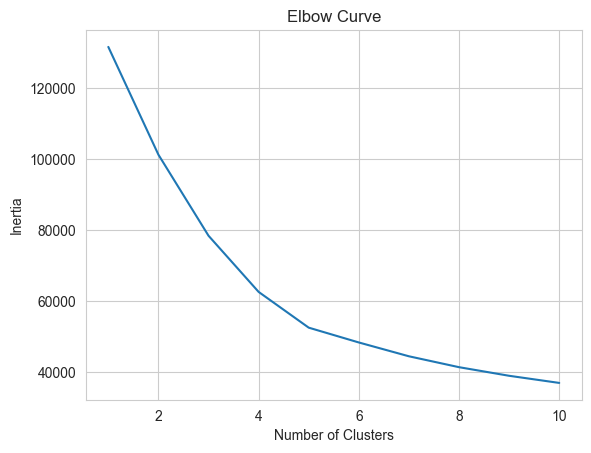

In [376]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Features for clustering
selected_features = ['online_order', 'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking']
location_columns = [col for col in combined_df.columns if 'location_' in col]
selected_features.extend(location_columns)
dish_columns = [col for col in combined_df.columns if 'dish_' in col][:5]
selected_features.extend(dish_columns)

# Subset the dataframe based on selected features
cluster_data = combined_df[selected_features]

# Determine optimal number of clusters using Elbow Method
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_data)
    inertia_list.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# After determining the optimal number of clusters from the plot, proceed with clustering
optimal_clusters = 3  # Change this based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(cluster_data)


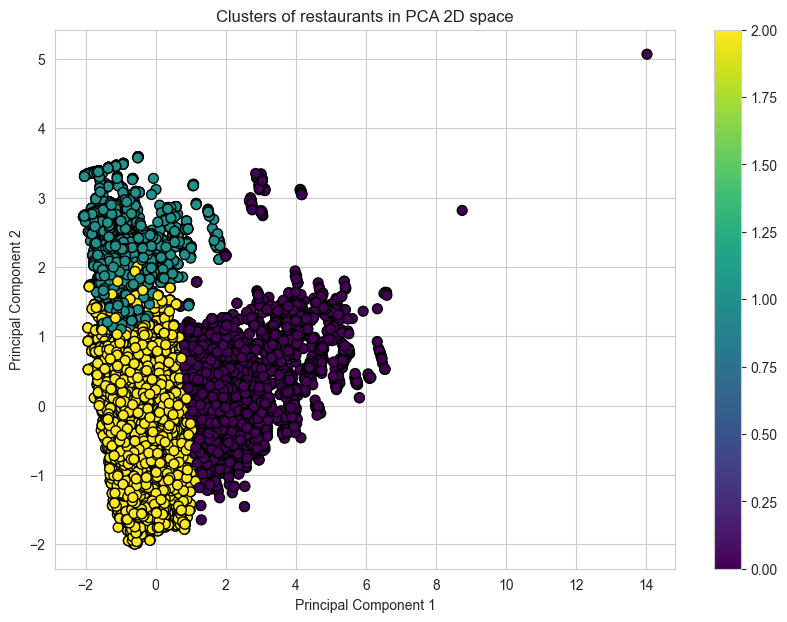

In [377]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

# Subset the dataframe based on selected features
cluster_data = combined_df[selected_features]

# Use PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(cluster_data)

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_data)

# Visualize the clusters in the 2D PCA space
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Clusters of restaurants in PCA 2D space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [368]:
# Apply PCA to the preprocessed data
pca = PCA(n_components=0.95, random_state=0)
combined_df_pca = pca.fit_transform(combined_df)

# Check the shape of the data after PCA
combined_df_pca.shape

(30562, 28)

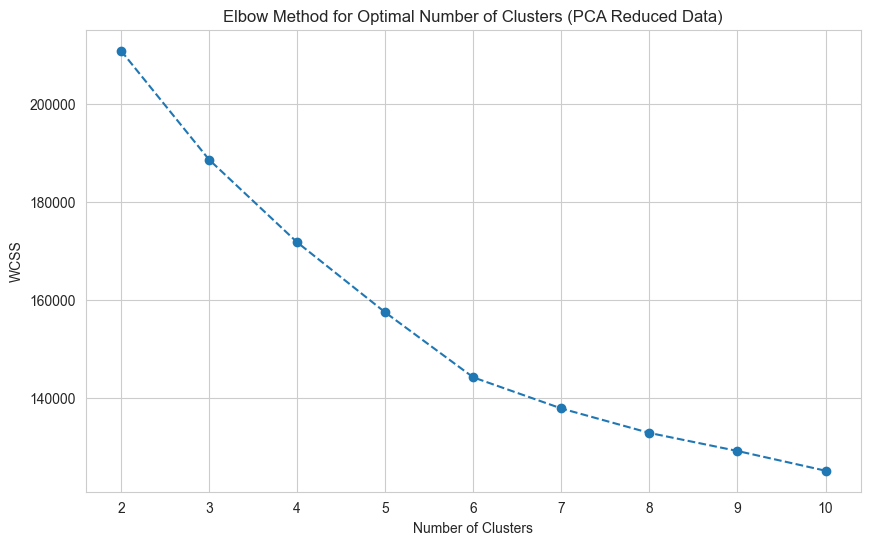

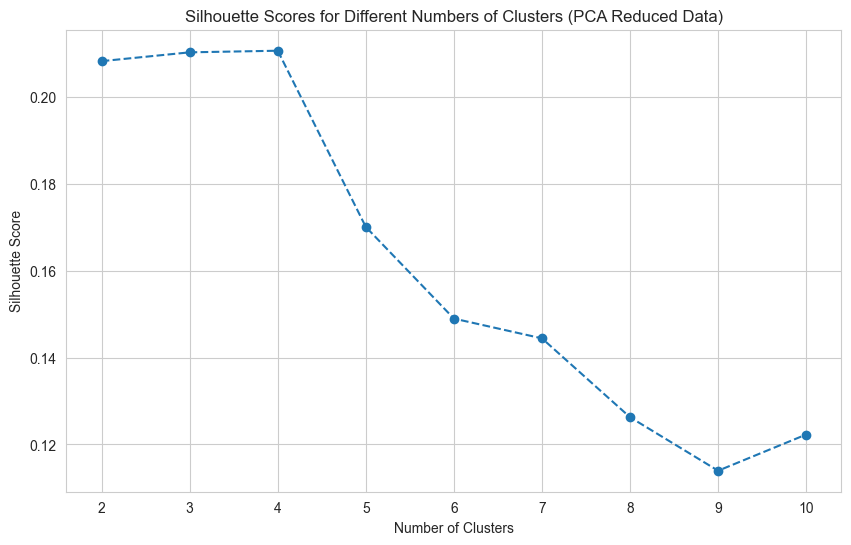

([210759.54803266597,
  188581.775190816,
  171755.1344070166,
  157482.67693343182,
  144252.98396473454,
  137916.62985475565,
  132937.78828736994,
  129261.05877151493,
  125243.43083135496],
 [0.20833235348349471,
  0.21036496474517688,
  0.21073627854992238,
  0.17010017540512296,
  0.1489840663354255,
  0.14442542030345196,
  0.12624534755538144,
  0.11391293046940694,
  0.12225778105133984])

In [375]:
import warnings
warnings.filterwarnings('ignore')
# Initialize variables for K-means clustering after PCA
wcss_pca = []  # Within-cluster sum of squares after PCA
silhouette_scores_pca = []  # Silhouette scores after PCA

cluster_range = range(2, 11)

# Run KMeans for different numbers of clusters to find the optimal number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(combined_df_pca)
    
    # Calculate and store WCSS (Within Cluster Sum of Squares)
    wcss_pca.append(kmeans.inertia_)
    
    # Calculate silhouette score and store
    silhouette_avg = silhouette_score(combined_df_pca, kmeans.labels_)
    silhouette_scores_pca.append(silhouette_avg)

# Plot the Elbow graph for PCA reduced data
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (PCA Reduced Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
#plt.savefig()

# Display silhouette scores for different number of clusters for PCA reduced data
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores_pca, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters (PCA Reduced Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
#plt.savefig()

wcss_pca, silhouette_scores_pca
